# Model Training and Testing!

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4

In [2]:
import pandas as pd
import numpy as np

### Raw test data

In [24]:
test_data = pd.read_csv(r"/content/drive/MyDrive/Project/test_tmdb_no_revenue.csv")

In [25]:
def drop_cols(data):
  data.drop(columns= [ 'imdb_id', 'movie_url', 'movie_title','title','poster_path','tagline', 'overview' ], inplace= True)
  return data

In [26]:
test_data = drop_cols(test_data)
test_data['keywords'].replace(np.nan, 'No keywords', inplace= True)

In [27]:
test_data.dropna(inplace= True)

In [28]:
test_data.isnull().sum()

movie_id                0
budget                  0
genres                  0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
runtime                 0
spoken_languages        0
status                  0
keywords                0
cast                    0
crew                    0
dtype: int64

In [29]:
test_data.shape

(994, 14)

### test data normailization

In [30]:
def normalization_data(data):
  """

  Args:
    Data: Dataframe

  Returns: Dataframe

  """
  Data = data
  from sklearn.preprocessing import LabelEncoder

  spoken_data = Data['spoken_languages'].str.get_dummies(sep =', ')
  Data.drop('spoken_languages', axis= 1, inplace= True)
  Data = pd.concat([Data, spoken_data] , axis= 1)
  genres_data = Data['genres'].str.get_dummies(sep =', ')

  Data = pd.concat([Data, genres_data] , axis= 1)
  Data.drop('genres', axis= 1, inplace= True)

  prod_countries = Data['production_countries'].str.get_dummies(sep= ', ')
  Data.drop('production_countries', axis= 1, inplace = True)
  Data = pd.concat([Data, prod_countries], axis= 1)

  Data['release_date'] = pd.to_datetime(Data['release_date'])

  # new cols year, month, day from release_date
  Data['year'] = Data['release_date'].dt.year
  Data['month'] = Data['release_date'].dt.month
  Data['day'] = Data['release_date'].dt.day

  # drop the release_date
  Data.drop(columns= 'release_date', inplace = True)

  # label encoding
  label_encoder= LabelEncoder()

  exclude_cols = ['production_countries', 'spoken_languages']

  categorical_columns = Data.select_dtypes(include=['object']).columns.tolist()

  columns_to_encode = [col for col in categorical_columns if col not in exclude_cols]

  for col in columns_to_encode:
    Data[col] = label_encoder.fit_transform(Data[col])

  return Data



In [31]:
test_Data = normalization_data(test_data)

In [33]:
test_Data.shape

(994, 123)

### data preparation for training

In [34]:
train_data = pd.read_csv(r"/content/drive/MyDrive/TMDB Box Office Prediction Output/U V Sai Praneeth uppalavenkatasaipraneeth19@gmail.com/Normalized_data.csv", index_col= 0)

In [35]:
train_data.head()

,id,budget,movie_url,imdb_id,original_language,movie_title,overview,popularity,poster_path,production_companies,...,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America,Venezuela,Zimbabwe,year,month,day
0,653346,160000000,1214,2361,0,1598,2906,6245.898,1775,62,...,0,0,0,0,1,0,0,2024,5,8
1,929590,50000000,1018,2891,0,613,2188,2730.901,3146,758,...,0,0,0,1,1,0,0,2024,4,10
2,823464,150000000,1384,2651,0,1198,1789,2726.153,3846,1475,...,0,0,0,0,1,0,0,2024,3,27
3,719221,8000000,1808,2604,0,2797,3648,2349.378,1753,2471,...,0,0,0,0,1,0,0,2024,5,1
4,573435,100000000,1276,3575,0,305,959,2486.516,2594,3378,...,0,0,0,0,1,0,0,2024,6,5


In [36]:
train_data.rename(columns= {'id': 'movie_id'}, inplace= True)

In [37]:
train_data = drop_cols(train_data)

In [38]:
train_data.drop(columns= 'log_revenue', inplace= True)

In [39]:
train_data.shape

(3960, 162)

In [43]:
missing_col = set(train_data.columns) - set(test_Data.columns)
missing_col

{'Austria',
 'Bahamas',
 'Bahasa melayu',
 'Bosanski',
 'Botswana',
 'Català',
 'Cymraeg',
 'Dominican Republic',
 'Eesti',
 'Esperanto',
 'Fulfulde',
 'Hrvatski',
 'Iceland',
 'Indonesia',
 'Jamaica',
 'Kenya',
 'Kuwait',
 'Lebanon',
 'Libyan Arab Jamahiriya',
 'Lietuvių',
 'Malta',
 'Montenegro',
 'Nederlands',
 'Norway',
 'Peru',
 'Saudi Arabia',
 'Slovakia',
 'Slovenia',
 'Slovenčina',
 'Somali',
 'South Korea',
 'Soviet Union',
 'Srpski',
 'Taiwan',
 'Turkey',
 'Venezuela',
 'Zimbabwe',
 'euskera',
 'isiZulu',
 'shqip',
 'spoken_languages',
 'suomi',
 'Český',
 'বাংলা',
 'ਪੰਜਾਬੀ',
 'தமிழ்',
 'සිංහල',
 'ქართული'}

In [44]:
for col in missing_col:
  test_Data[col] = 0

In [45]:
test_Data = test_Data[train_data.columns]

In [47]:
# test_Data.drop(columns='revenue', inplace= True)

KeyError: "['revenue'] not found in axis"

In [48]:
test_Data.shape

(994, 161)

### model training

In [49]:
from pycaret.regression import *

In [50]:
regressor = RegressionExperiment()

In [51]:
regressor.setup(data= train_data, target= 'revenue', session_id= 123)

,Description,Value
0,Session id,123
1,Target,revenue
2,Target type,Regression
3,Original data shape,"(3960, 162)"
4,Transformed data shape,"(3960, 162)"
5,Transformed train set shape,"(2772, 162)"
6,Transformed test set shape,"(1188, 162)"
7,Numeric features,160
8,Categorical features,1
9,Preprocess,True


In [52]:
# train_data.columns.to_list()

['movie_id',
 'budget',
 'original_language',
 'popularity',
 'production_companies',
 'runtime',
 'spoken_languages',
 'status',
 'keywords',
 'cast',
 'crew',
 'revenue',
 'Afrikaans',
 'Bahasa indonesia',
 'Bahasa melayu',
 'Bosanski',
 'Català',
 'Cymraeg',
 'Dansk',
 'Deutsch',
 'Eesti',
 'English',
 'Español',
 'Esperanto',
 'Français',
 'Fulfulde',
 'Gaeilge',
 'Hrvatski',
 'Italiano',
 'Kiswahili',
 'Latin',
 'Lietuvių',
 'Magyar',
 'Nederlands',
 'No Language',
 'Norsk',
 'Polski',
 'Português',
 'Pусский',
 'Română',
 'Slovenčina',
 'Somali',
 'Srpski',
 'Tiếng Việt',
 'Türkçe',
 'euskera',
 'isiZulu',
 'shqip',
 'suomi',
 'svenska',
 'Íslenska',
 'Český',
 'ελληνικά',
 'Український',
 'български език',
 'עִבְרִית',
 'اردو',
 'العربية',
 'فارسی',
 'پښتو',
 'हिन्दी',
 'বাংলা',
 'ਪੰਜਾਬੀ',
 'தமிழ்',
 'සිංහල',
 'ภาษาไทย',
 'ქართული',
 '广州话 / 廣州話',
 '日本語',
 '普通话',
 '한국어/조선말',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy

In [53]:
best_model = regressor.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,81167556.3493,18446676138611208.0000,134559539.2253,0.5804,1.6876,17770.8816,1.5020
lightgbm,Light Gradient Boosting Machine,82268653.5538,19327519921106072.0000,137583385.1008,0.5644,1.6867,18346.9875,1.0540
rf,Random Forest Regressor,82319156.0275,19552998292455420.0000,138274320.6005,0.5591,1.6971,19403.1420,5.3890
et,Extra Trees Regressor,83637207.8590,20005132689817800.0000,139361898.9471,0.5556,1.6945,9348.7534,4.5190
xgboost,Extreme Gradient Boosting,83310296.0000,20152920815593064.0000,140502388.0000,0.5411,1.7042,27753.0355,0.9100
en,Elastic Net,92705621.4040,24279101909423996.0000,153727116.1077,0.4594,1.6876,14944.3517,0.3560
ridge,Ridge Regression,95351662.8283,24204022501709580.0000,153701849.0880,0.4569,1.7496,16733.2933,0.1660
omp,Orthogonal Matching Pursuit,93667927.2885,24367435333198176.0000,154000275.7535,0.4566,1.6951,13502.7266,0.2960
br,Bayesian Ridge,92943501.2626,24560579906309996.0000,154684591.4097,0.4510,1.6930,6230.0138,0.2070
llar,Lasso Least Angle Regression,96189957.1766,24433563427224472.0000,154506779.1659,0.4505,1.7538,16465.5769,0.3340


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [54]:
print(best_model)

GradientBoostingRegressor(random_state=123)


In [55]:
# getting best model
regressor.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

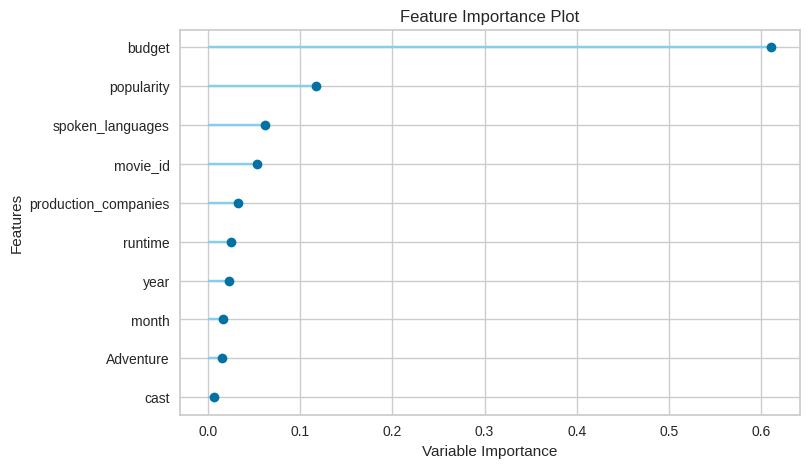

In [56]:
regressor.plot_model(best_model, plot= 'feature')

In [57]:
regressor.predict_model(best_model, data=test_Data)

,movie_id,budget,original_language,popularity,production_companies,runtime,spoken_languages,status,keywords,cast,...,Ukraine,United Arab Emirates,United Kingdom,United States of America,Venezuela,Zimbabwe,year,month,day,prediction_label
0,41210,19000000,0,37.077000,426,101,0,1,630,420,...,0,0,0,1,0,0,2010,5,11,8.396826e+07
1,281,42000000,0,28.075001,10,145,0,1,362,763,...,0,0,0,1,0,0,1995,10,13,2.523981e+08
2,16290,20000000,0,16.325001,416,99,0,1,651,488,...,0,0,0,1,0,0,2010,10,15,6.437974e+07
3,25239,80000,0,27.573000,184,101,0,1,740,135,...,0,0,0,1,0,0,1978,11,2,5.304520e+07
4,2294,22000000,0,16.320999,198,104,0,1,311,399,...,0,0,0,1,0,0,2001,8,22,5.987329e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,3594,30000000,0,19.034000,263,98,0,1,435,448,...,0,0,0,1,0,0,2007,2,23,7.476038e+07
999,19064,3200000,0,16.781000,509,94,0,1,920,447,...,0,0,0,1,0,0,1985,11,15,4.756716e+07
1000,129670,12000000,0,14.125000,543,115,0,1,835,124,...,0,0,0,1,0,0,2013,9,21,4.499197e+07
1001,256924,10000000,0,18.035000,676,107,0,1,205,12,...,0,0,0,1,0,0,2015,3,19,5.441712e+07


In [89]:
regressor.save_model(best_model, '/content/drive/MyDrive/TMDB Box Office Prediction Output/U V Sai Praneeth uppalavenkatasaipraneeth19@gmail.com/GradientBoostingRegressorModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['movie_id', 'budget',
                                              'original_language', 'popularity',
                                              'production_companies', 'runtime',
                                              'status', 'keywords', 'cast',
                                              'crew', 'Afrikaans',
                                              'Bahasa indonesia',
                                              'Bahasa melayu', 'Bosanski',
                                              'Català', 'Cymraeg', 'Dansk',
                                              'Deutsch', 'Eesti', 'English',
                                              'Español', 'Esperanto', 'Fr...
                  TransformerWrapper(include=['spoken_languages'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 (

In [90]:
Model = load_model('GradientBoostingRegressorModel')

Transformation Pipeline and Model Successfully Loaded


In [67]:
regressor.plot_model(Model, plot='confusion_matrix')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,85590517.1762,19652151612318552.0000,140186132.0257,0.5659,1.7616,97.4381


,movie_id,budget,original_language,popularity,production_companies,runtime,spoken_languages,status,keywords,cast,...,United Arab Emirates,United Kingdom,United States of America,Venezuela,Zimbabwe,year,month,day,revenue,prediction_label
1209,33,14400000,0,53.333000,3310,130,English,3,2958,782,...,0,0,1,0,0,1992,8,7,159157440.0,1.023089e+08
1427,19384,7000000,0,42.875000,2860,91,English,3,1641,1000,...,0,0,1,0,0,1990,1,26,9200000.0,4.328155e+07
2736,763,3000000,0,42.469002,3406,103,English,3,1893,3638,...,0,0,0,0,0,1992,8,13,242623.0,1.261662e+08
3130,13851,3500000,0,24.389999,737,76,"English, 日本語",3,141,2231,...,0,0,1,0,0,2008,7,8,144493648.0,7.411549e+07
3496,12783,17759769,0,28.622999,300,110,English,3,20,2198,...,0,1,1,0,0,2008,9,5,43306324.0,5.164495e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1072790,25000000,0,231.481995,1958,104,English,3,231,3544,...,0,0,1,0,0,2023,12,21,214891376.0,1.079788e+08
1669,8271,20000000,0,32.522999,892,105,"English, Español",3,2008,3453,...,0,0,1,0,0,2007,4,12,117760136.0,6.779435e+07
3789,9037,13200000,0,21.681000,2077,115,English,3,2440,2630,...,0,1,1,0,0,1982,6,11,15172313.0,5.606799e+07
3647,23047,40000000,0,34.022999,268,95,"Latin, English",3,3870,2872,...,0,0,1,0,0,2011,1,7,91627232.0,1.096335e+08


In [61]:
predictions = Model.predict(test_Data)

In [70]:
predictions = pd.DataFrame(predictions)

In [73]:
predictions.rename(columns={0: 'predictions'}, inplace= True)

In [77]:
results = pd.concat([test_Data['movie_id'], predictions], axis= 1)

In [80]:
results.isna().sum()

movie_id       9
predictions    9
dtype: int64

In [84]:
results.dropna(inplace= True)

In [85]:
results['moive_id'] = results['movie_id'].astype(int)

In [86]:
results.head()

,movie_id,predictions,moive_id
0,41210.0,8.396826e+07,41210
1,281.0,2.523981e+08,281
2,16290.0,6.437974e+07,16290
3,25239.0,5.304520e+07,25239
4,2294.0,5.987329e+07,2294


In [87]:
results.to_csv('/content/drive/MyDrive/TMDB Box Office Prediction Output/U V Sai Praneeth uppalavenkatasaipraneeth19@gmail.com/predictions.csv', index= False)